In [5]:
# src - https://networkx.org/documentation/stable/auto_examples/algorithms/plot_rcm.html#sphx-glr-download-auto-examples-algorithms-plot-rcm-py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

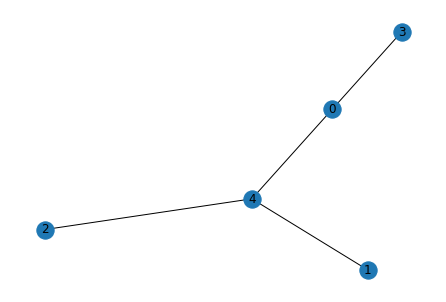

[[0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 1 1 0 0]]


In [14]:
# build low-bandwidth numpy matrix
# Graph 9 from bandwidth_visualizer
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0, 3), (1, 4), (2, 4), (4, 0)])
A = nx.adjacency_matrix(G)
nx.draw(G, with_labels=True)
plt.show()
print(A.todense())

In [15]:
rcm = list(nx.utils.reverse_cuthill_mckee_ordering(G))
print("ordering", rcm)

ordering [2, 1, 4, 0, 3]


In [17]:
print("unordered Laplacian matrix")
A = nx.laplacian_matrix(G)
x, y = np.nonzero(A)
print(f"lower bandwidth: {(y - x).max()}")
print(f"upper bandwidth: {(x - y).max()}")
print(f"bandwidth: {(y - x).max() + (x - y).max() + 1}")
print(A.todense())

unordered Laplacian matrix
lower bandwidth: 4
upper bandwidth: 4
bandwidth: 9
[[ 2  0  0 -1 -1]
 [ 0  1  0  0 -1]
 [ 0  0  1  0 -1]
 [-1  0  0  1  0]
 [-1 -1 -1  0  3]]


In [19]:
B = nx.laplacian_matrix(G, nodelist=rcm)
print("low-bandwidth Laplacian matrix")
x, y = np.nonzero(B)
print(f"lower bandwidth: {(y - x).max()}")
print(f"upper bandwidth: {(x - y).max()}")
print(f"bandwidth: {(y - x).max() + (x - y).max() + 1}")
print(B.todense())

low-bandwidth Laplacian matrix
lower bandwidth: 2
upper bandwidth: 2
bandwidth: 5
[[ 1  0 -1  0  0]
 [ 0  1 -1  0  0]
 [-1 -1  3 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  1]]


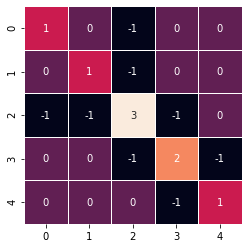

In [20]:
sns.heatmap(B.todense(), cbar=False, square=True, linewidths=0.5, annot=True)
plt.show()